# Utlizing iris dataset and simple post prunning technique

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = sns.load_dataset('iris')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
## label encoding for target column

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [7]:
df['species']=labelencoder.fit_transform(df['species'])

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
# getting sets of dependent and independent variables
y = df.pop('species')
X = df

In [12]:
print(X.head())
y.head()

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

In [13]:
# splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25, random_state=42)

In [14]:
print(X_train.shape, X_test.shape, X.shape)

(112, 4) (38, 4) (150, 4)


## Decision tree classifier model

In [20]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [21]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

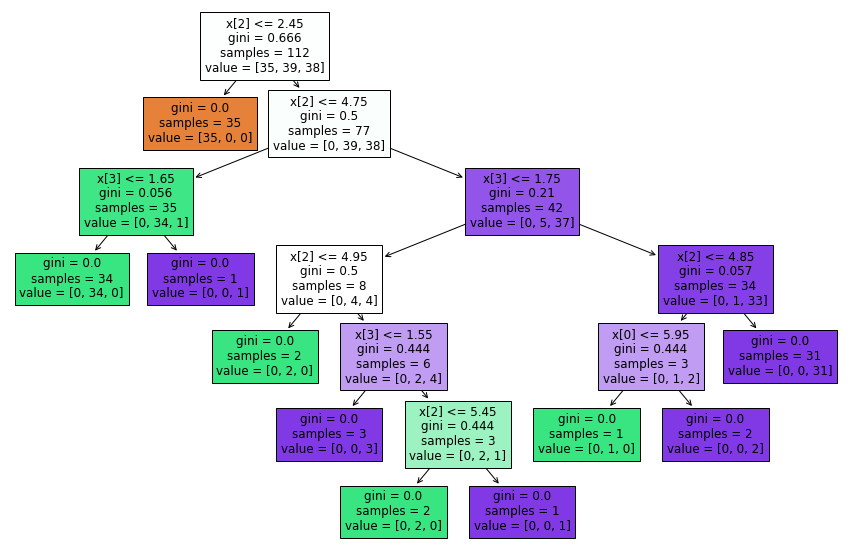

In [18]:
# visualizing the created tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtc, filled=True)
plt.show()

In [22]:
#predictions

preds = dtc.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(preds, y_test))
print(classification_report(preds, y_test))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



# Since accuracy obtianed is 1, the model seems to be too perfect.

## From the decision tree obtianed above, we can see that at depth 2, the are two nodes with one category having highest count

## Applying post prunning

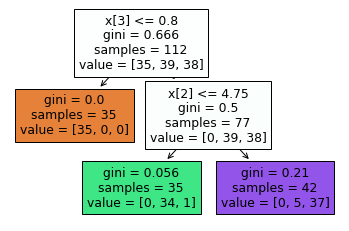

In [25]:
dtc =  DecisionTreeClassifier(max_depth = 2)
dtc.fit(X_train, y_train)
tree.plot_tree(dtc, filled=True)
plt.show()

In [26]:
preds = dtc.predict(X_test)
print(accuracy_score(preds, y_test))
print(classification_report(preds, y_test))

0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.91      1.00      0.95        10
           2       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



# this is more generalized, as we have set the depth, the accuracy has slightly decreased as we have not reached to the all leaf nodes like the 1st case.

### The trees can be compared and the depth is the answer for less accuracy.